## Density Matrix Reconstruction with L1/L2 Data Fidelity Terms

### Overview

This code performs a convergence analysis using the Chambolle-Pock algorithm with L1-norm data fidelity. The problem being solved involves a forward model for quantum state tomography, which aims to reconstruct the density matrix of a quantum state from measurements. The parameters of the problem, such as the coupling strength (g), the number of measured states (Nrho), and the fidelity function (L1-norm or L2-norm), are set at the beginning of the code.

The Chambolle-Pock algorithm is implemented using a MatrixMult operator created from the forward model matrix, calculated with the function T_mat(). The algorithm is run for a specified number of iterations (niter), and the objective function value and change in rho over time are plotted.

The evaluate() function is used as part of the forward model to solve the problem during the inversion algorithm. The spdiags_py() function imitates the spdiags function in Matlab and creates a sparse band and diagonal matrix. The svec() and smat() functions convert between a Hermitian matrix and a vector.

The Chambolle-Pock algorithm and the L1 data fidelity can be used to solve the inverse problem of electron density matrix identification, which is the problem of reconstructing the electron density matrix from the scattered intensity pattern.

The Chambolle-Pock algorithm is a primal-dual algorithm for solving convex optimization problems. It is particularly well-suited for problems involving non-smooth regularization terms, such as the L1 data fidelity term.

The L1 data fidelity term is a measure of the difference between the measured scattered intensity pattern and the scattered intensity pattern predicted by the electron density matrix. It is a more robust measure of the difference than the L2 data fidelity term, which is often used in inverse problems.

To use the Chambolle-Pock algorithm to solve the inverse problem of electron density matrix identification, you would first need to formulate the problem as a convex optimization problem. This can be done by minimizing the L1 data fidelity term subject to the constraint that the electron density matrix is Hermitian and non-negative.

Once the problem has been formulated as a convex optimization problem, you can use the Chambolle-Pock algorithm to solve it. The Chambolle-Pock algorithm will iteratively update the electron density matrix until it converges to a solution that minimizes the L1 data fidelity term.

Here is a general overview of how to use the Chambolle-Pock algorithm to solve the inverse problem of electron density matrix identification:

1. Formulate the problem as a convex optimization problem.
2. Initialize the electron density matrix.
3. Iterate the following steps until convergence:
    * Compute the gradient of the objective function with respect to the electron density matrix.
    * Update the electron density matrix using the Chambolle-Pock algorithm.
4. Return the electron density matrix.



The code defines a number of functions used in the inversion algorithm for quantum state tomography. The first few lines import necessary libraries and modules, such as NumPy, h5py, and matplotlib. The functions  `jv`  and  `toeplitz`  are imported from  `scipy.special`  and  `scipy.linalg` , respectively. The  `MatrixMult`  class is imported from the  `pylops`  module.
 The code defines several parameters for the inversion algorithm, including the coupling strength  `g` , the number of states  `N` , and the number of phase values  `Ntheta` . The phase values are generated using the  `np.linspace`  function. The  `besselj`  function is defined as an alias for  `jv` .
 The  `bess_mats`  dictionary is then defined to store Bessel matrices for different values of  `m` . The  `for`  loop constructs each Bessel matrix as a product of two Toeplitz matrices of Bessel functions. These matrices are then stored in the  `bess_mats`  dictionary.
 Next, the Fourier transform matrix  `FT`  is defined using  `np.exp`  and reshaped using  `numpy.reshape` .
 The function  `spdiags_py`  imitates the  `spdiags`  function in MATLAB. It takes a matrix  `A`  and a list  `k`  as arguments and returns a sparse matrix with the given diagonals. The function  `svec`  converts a Hermitian matrix  `A`  into a vector  `v` . The function  `smat`  is inverse of  `svec` .
 The  `evaluate`  function solves the forward problem during the inversion algorithm. It converts the input vector  `rho_vec`  to a Hermitian matrix  `rho` , creates a sparse band and diagonal matrix of nonzero diagonals, and returns the output of the forward problem as a vector.
 The  `T_mat`  function returns a matrix  `T`  for use in the inversion algorithm. It iterates over all indices of a matrix of size  `matSize`  and calls  `evaluate`  with a vector having a 1 at that index and zeros elsewhere. The output of  `evaluate`  for each vector is stored as a column of  `T` .

 The "chambolle_pock_convergence" function takes in a vector "rho_vec" and several optional parameters such as a function "data_fidelity" (which by default is set to the L1 data fidelity function), the number of iterations "niter", the value of "tau", "sigma", and "theta".
 First, the function creates a copy of "rho_vec" and initializes the forward model matrix "T" using the "T_mat" function. It then creates a MatrixMult operator using the MatrixMult class and passes in the forward model matrix "T".
 The function then initializes empty lists to hold the objective function values and the change in "rho" values over time.
 The function then performs Chambolle-Pock iterations for "niter" times. In each iteration, it evaluates "rho" and "rho_dual" using the "evaluate" function, subtracts the data fidelity term (using either L1 or L2 data fidelity function), and updates "rho_new" using the "H" operator (conjugate of "T") and the "sigma" value.
 Finally, the new "rho" value is updated using the "theta" value and the previous "rho" value. The objective function value and the change in "rho" values are appended to their respective lists, and the new "rho" value is assigned to "rho".
 The function returns the final "rho" value, the objective function values over time, and the change in "rho" values over time.
-  rho_vec :  rho_vec  is the input parameter that determines the initial values for the autoregressive parameter  rho  used in the VAR model. It is updated iteratively during the Chambolle-Pock algorithm to obtain an estimate of  rho  that minimizes the data fidelity term.
-  T_mat() :  T_mat()  is the function that returns the matrix of time series observations that is used to estimate the VAR model parameters, including  rho . The forward model matrix  T  is calculated from  T_mat()  and is used to create a  MatrixMult  operator. The  MatrixMult  operator is then used to calculate the prediction error, which is used in the data fidelity term during the Chambolle-Pock iterations.
Thus,  rho_vec  is an input parameter that determines the initial values of  rho , while  T_mat()  is a function that returns the time series observations used to estimate the VAR model parameters. Both  rho_vec  and  T_mat()  are used in the implementation of the Chambolle-Pock algorithm to iteratively estimate  rho  that best fits the data.

The rho_changes in the context of the Chambolle-Pock algorithm represent how much the variable rho changes from one iteration to the next during the optimization process. These changes provide insights into the convergence behavior and stability of the algorithm.

In the context of optimization and inverse problems, such as image reconstruction, the objective function serves as a measure of how well a particular solution (reconstructed image) aligns with the available data and prior information or constraints. When comparing different objective function values:

Lower Objective Function Value: A lower objective function value typically indicates a better fit between the reconstructed image and the available data. In other words, it suggests that the reconstructed image is closer to the ground truth or true solution in terms of the optimization problem's criteria.
Higher Objective Function Value: A higher objective function value suggests that the reconstructed image does not fit the data as well as another solution. It might indicate that the reconstructed image deviates more from the true solution or does not satisfy the constraints imposed by the data fidelity term and regularization term.




A lower objective function value typically indicates a better fit between the
 reconstructed image and the available data. In other words, it suggests that
 the reconstructed image is closer to the ground truth or true solution in
 terms of the optimization problem's criteria.


In [ ]:
!pip3 install pylops

In [ ]:
import numpy as np
from scipy.linalg import toeplitz
import scipy.io as sio
import numpy as np
from scipy.special import jv
import pylops
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import mean_squared_error, structural_similarity
import pandas as pd

besselj = jv


class ForwardProblem:
    # Default parameters
    def __init__(self, p):
        self.Nrho = p['Nrho']
        self.Ntheta = p['Ntheta']
        self.N = p['N']
        self.g = p['g']
        self.g_known = p['g_known']
        self.g_synth = p['g_synth']
        self.noiselevel_theta = p['noiselevel_theta']
        self.noiselevel_Poisson = p['noiselevel_Poisson']
        self.syntheticdata_flag = p['syntheticdata_flag']
        self.rho_ex = p['rho_ex']
        self.theta = np.linspace(0, np.pi, self.Ntheta, endpoint=False)
        self.FT = np.exp(-2j*np.arange(-self.N, self.N +
                         1).reshape((-1, 1)) * self.theta.reshape((1, -1)))

    # Create synthetic data to test

    def create_synthetic_data(self):
        N = self.N
        if self.N == self.Nrho:
            rho_ex = self.rho_ex.copy() if isinstance(
                self.rho_ex, np.ndarray) else np.array(self.rho_ex)
        else:
            rho_ex = np.zeros((N + 1, N + 1))
            ind = np.arange(1, self.Nrho + 2) + (N - self.Nrho) / 2
            rho_ex[ind.astype(int), ind.astype(int)] = self.rho_ex

        nn = np.subtract.outer(np.arange(-N, N + 1), np.arange(-N, N + 1)[::2])
        I = np.zeros((2 * N + 1, self.Ntheta))
        I_ex = I
        qnoise = self.noiselevel_theta * 2 * np.pi * \
            np.random.randn(len(self.theta)) * (np.abs(0.01 *
                                                       np.random.randn(len(self.theta))) > 0.01)

        if self.g_known:
            g = self.g
        else:
            g = self.g_synth
        bessel_mat = np.outer(besselj(0, 2 * g), besselj(0, 2 * g))

        for j in range(self.Ntheta):
            U = np.exp(1j * nn * (self.theta[j] + qnoise[j])) * bessel_mat
            I[:, j] = np.maximum(0, np.real(
                np.diag(np.dot(U, np.dot(rho_ex, U.conj().T)))))
            U = np.exp(1j * nn * self.theta[j]) * bessel_mat
            I_ex[:, j] = np.maximum(0, np.real(
                np.diag(np.dot(U, np.dot(rho_ex, U.conj().T)))))

        self.y_ex = I_ex.ravel()
        Imeas = I.ravel()

        if self.noiselevel_Poisson < np.inf:
            Imeas = np.random.poisson(
                Imeas / np.sum(Imeas) * self.noiselevel_Poisson) / (self.noiselevel_Poisson / np.sum(Imeas))
        return Imeas

    def bessl_mat(self, N):
        bess_mats = {}
        for m in range(-N, N+1):
            aux = toeplitz(besselj(range(2*N+1), 2 * self.g), besselj(range(0, -2*N-1, -1), 2 * self.g)) \
                * toeplitz(besselj(range(2*m, 2*(N+m)+1), 2 * self.g), besselj(range(2*m, 2*(-N+m)-1, -1), 2 * self.g))
            bess_mats[m+N] = aux[:, ::2]
        return bess_mats

    def spdiags_py(self, A, k):
        ret = []
        for i in k:
            ret += [[0] * max(0, i) + list(np.diag(A, i)) + [0] * max(0, -i)]
        return np.array(ret).T

    # Evaluate the forward problem

    def evaluate(self, rho_vec):
        bess_mats = self.bessl_mat(self.N)
        N = self.N
        if N == self.Nrho:
            rho = self.smat(rho_vec)
        else:
            rho = np.zeros((N+1, N+1))
            a = (N - self.Nrho)//2
            b = a + self.Nrho+1
            rho[a:b, a:b] = self.smat(rho_vec)
        rho_diags = self.spdiags_py(rho.T, range(-N, N+1))
        Itilde = np.zeros((2 * N+1, 2 * N+1), dtype=np.complex64)

        for m in range(-N, N+1):
            if not self.g_known:
                aux = toeplitz(besselj(range(2*N+1), 2 * self.g), besselj(range(0, -2*N-1, -1), 2 * self.g)) \
                    * toeplitz(besselj(range(2*m, 2*(N+m)+1), 2 * self.g), besselj(range(2*m, 2*(-N+m)-1, -1), 2 * self.g))
                bess_mats[m+N] = aux[:, ::2]
            Itilde[:, m+N] = bess_mats[m + N]@rho_diags[:, m+N]
        Ix = np.real(Itilde@self.FT)
        return Ix.reshape(-1)

    # Compute the T matrix

    def Tmat(self):
        matSize = self.Nrho + 1
        T = np.zeros(((2 * self.N + 1) * self.Ntheta, matSize**2))
        for cntr in range(matSize**2):
            e = np.zeros(matSize**2)
            e[cntr] = 1
            T[:, cntr] = self.evaluate(e)
        return T

    def svec(self, A):
        N = A.shape[0]  # = Nrho
        v = np.zeros((N+1)**2)
        Lind = np.tril_indices(self.Nrho+1, -1)
        v[:N*(N+1)//2] = np.sqrt(2)*np.real(A[Lind])
        v[N*(N+1)//2:N*(N+1)] = np.sqrt(2)*np.imag(A[Lind])
        v[N*(N+1):] = np.real(np.diag(A))
        return v

    def smat(self, v):
        N = int(len(v)**0.5)-1  # = Nrho
        A = np.zeros((N+1, N+1), dtype=np.complex64)
        Lind = np.tril_indices(self.Nrho+1, -1)
        A[Lind] = 1/np.sqrt(2)*(v[:N*(N+1)//2] + 1j*v[N*(N+1)//2:N*(N+1)])
        return A + A.T + np.diag(v[N*(N+1):])

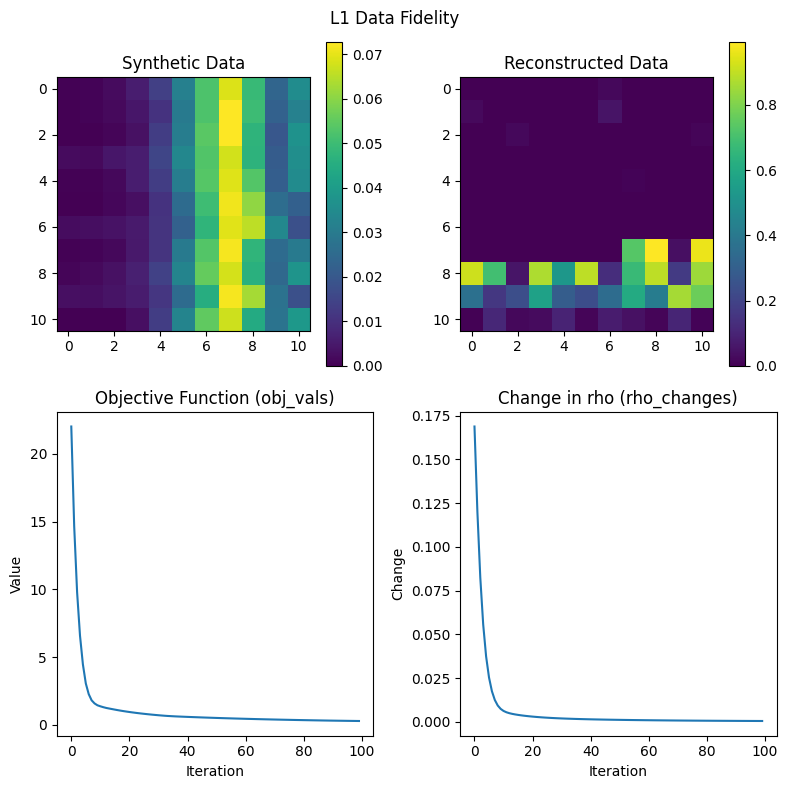

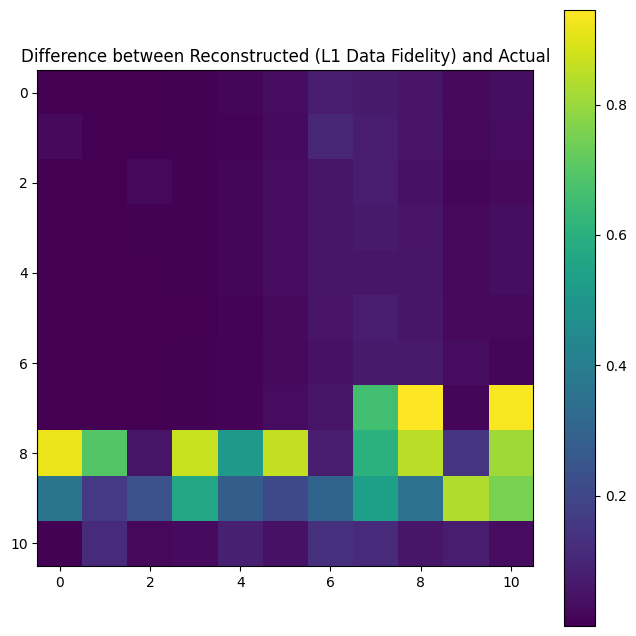

<ipython-input-12-ab5b88b6d137>:105: RuntimeWarning: invalid value encountered in double_scalars
  rho_change = np.linalg.norm(rho_new - rho) / np.linalg.norm(rho)


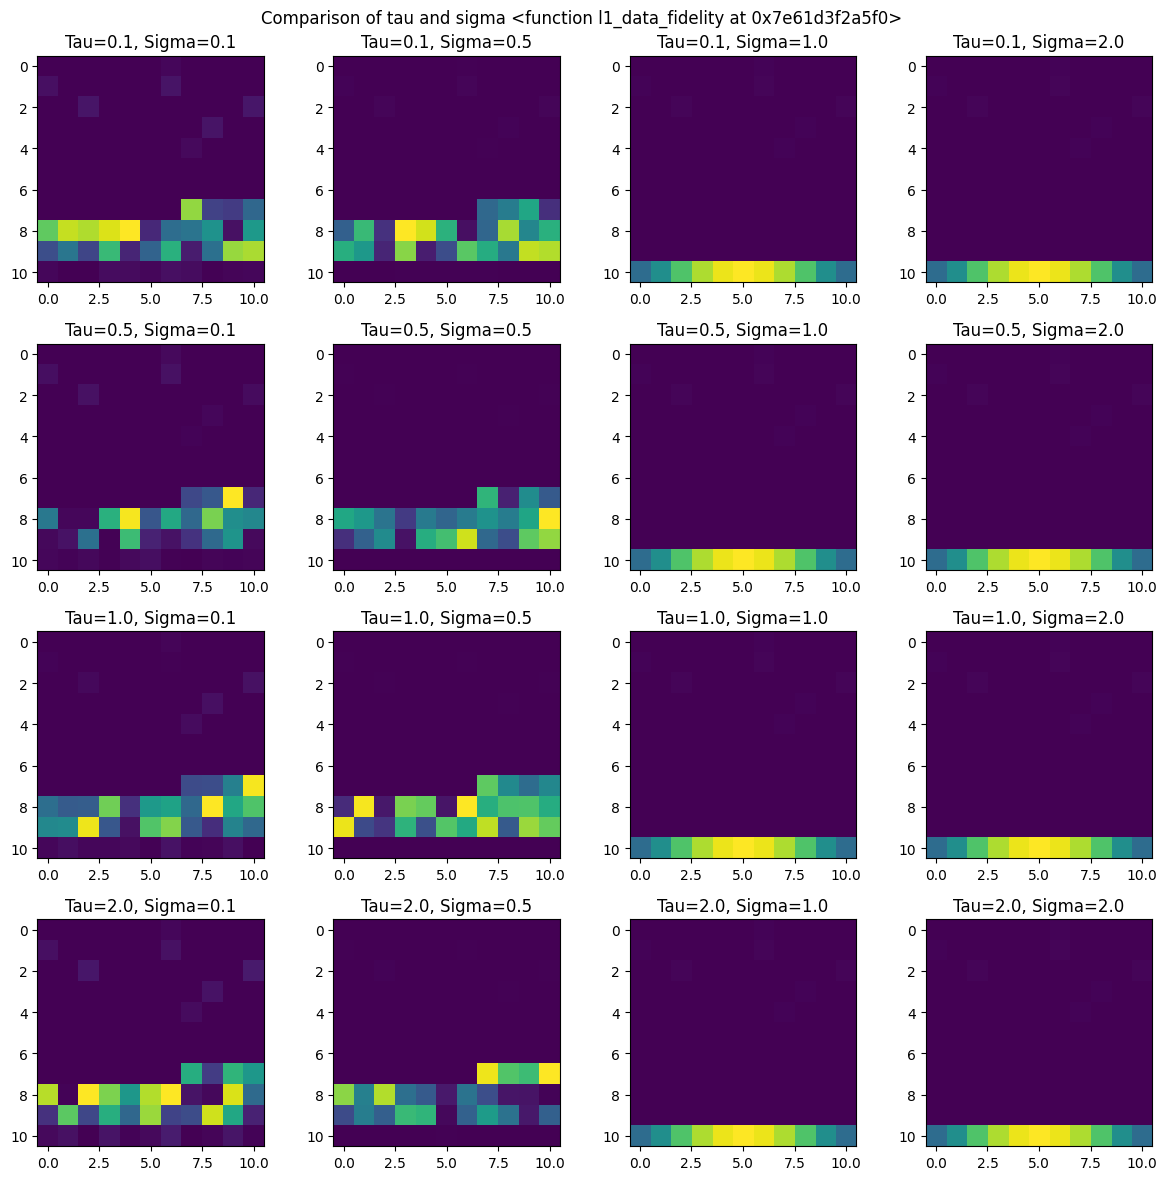

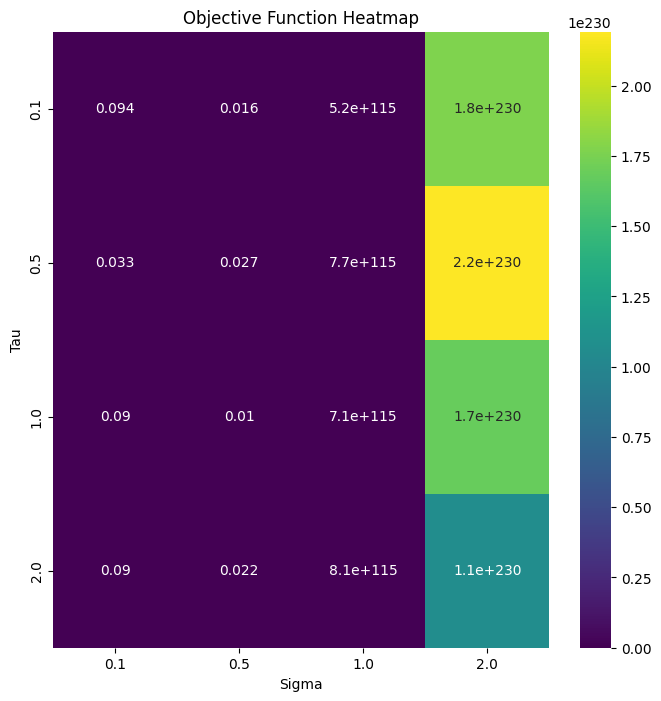

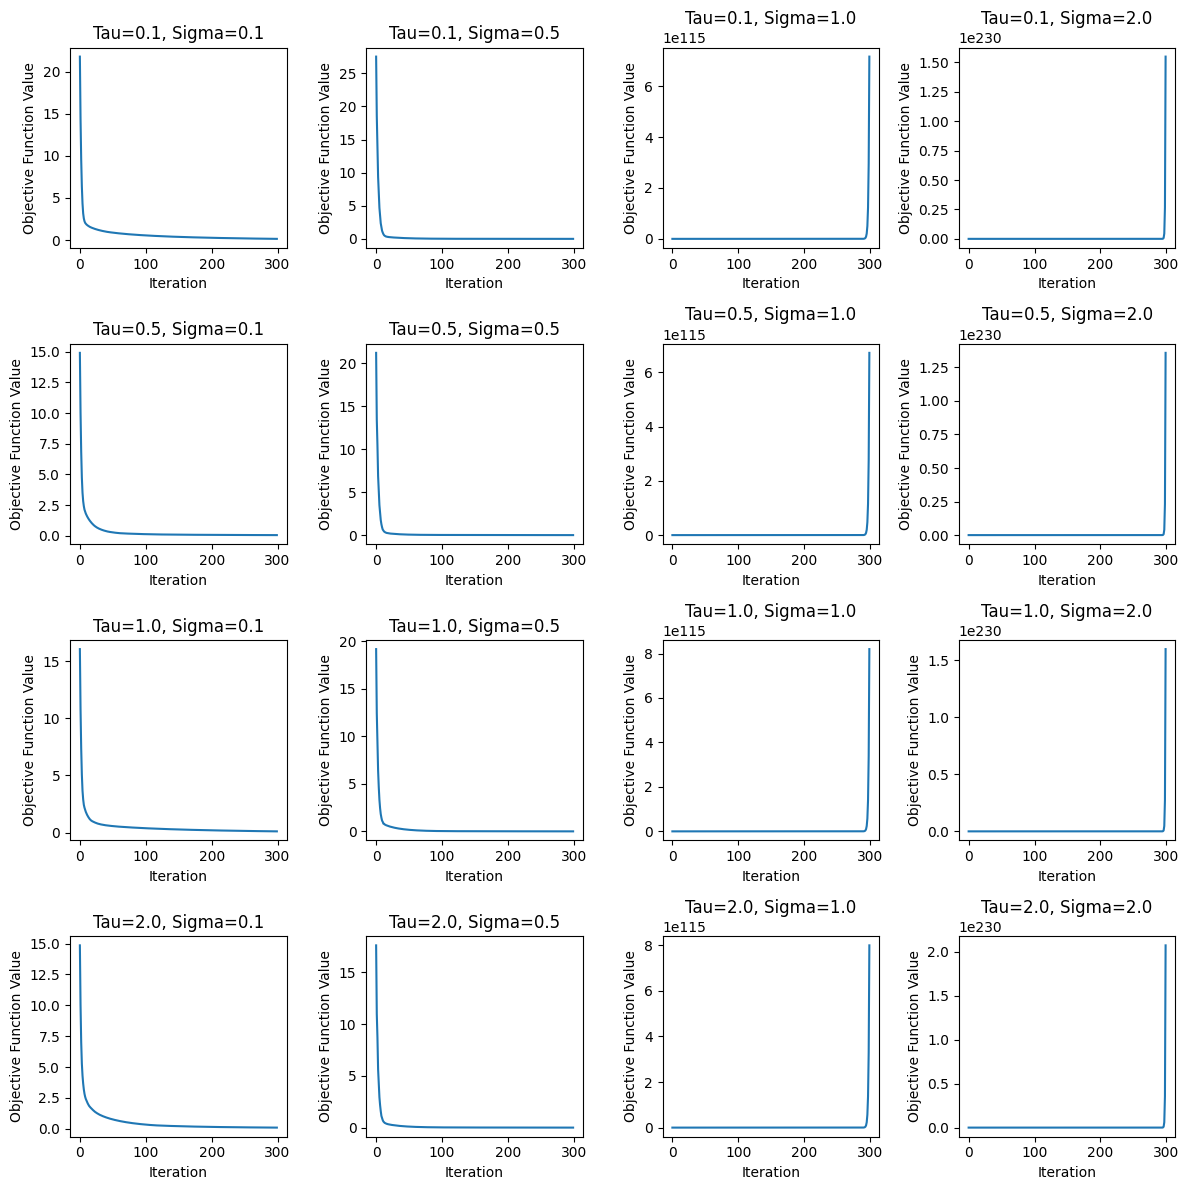

In [ ]:
# Step 1: Load experimental data and parameters
p_experimental = expdata()
F_exp = ForwardProblem(p_experimental)

# Step 2: Extract experimental data
# Step 2: Extract experimental data
T_exp = F_exp.Tmat()

data = sio.loadmat('data.mat')
experimental_data = data['data'][:T_exp.shape[0], 1]

# Step 3: Compute the forward operator matrix T
T_exp = pylops.MatrixMult(T_exp)

# Step 4: Use Chambolle-Pock algorithm for reconstruction
reconstructed_rho, obj_vals_, rho_changes = chambolle_pock_convergence(
    experimental_data, T_exp, l1_data_fidelity, niter=100, tau=1, sigma=0.1, theta=1)

difference = np.abs(reconstructed_rho.reshape(
    p_experimental['Nrho'] + 1, -1) - p_experimental['rho_ex'])

# Plot the results
plot_results(p_experimental, reconstructed_rho, obj_vals_,
             rho_changes, 'Synthetic Data', 'L1 Data Fidelity')

# Plot the difference
plt.figure(figsize=(8, 8))
plt.title('Difference between Reconstructed (L1 Data Fidelity) and Actual')
plt.imshow(difference, cmap='viridis')
plt.colorbar()
plt.show()

plot_variable_changes(p_experimental, experimental_data, T_exp, l1_data_fidelity)

objective_value_heatmap(experimental_data, T_exp, l1_data_fidelity)

objective_value_plot(experimental_data, T_exp, l1_data_fidelity)

# calculate_mse(experimental_data, T_exp, l2_data_fidelity)

In [ ]:
# Function to create paramters for using synthetic data (similar to matlab function)
def synthetic():
    # Initialize the parameter dictionary p
    p = {}

    # Parameters of the forward operator
    p['g'] = 2.5
    p['N'] = 10
    p['Nrho'] = 10
    p['noiselevel_theta'] = 0.03
    p['noiselevel_Poisson'] = 1e5
    p['syntheticdata_flag'] = True
    p['Ntheta'] = 4
    p['theta'] = np.linspace(0, 2*np.pi, p['N'])
    p['g_known'] = True
    p['g_synth'] = 2

    # Create a 'true' mixed state p['rho_ex'] as the exact solution
    num_samples = p['N']
    phi = 0.07 * 2 * np.pi * np.random.randn(num_samples)
    dg = 0.1 * np.random.randn(num_samples)
    gex = 1 + dg
    nn = np.arange(-p['N'] // 2, p['N'] // 2 + 1)
    p['rho_ex'] = np.zeros((p['N'] + 1, p['N'] + 1), dtype=np.complex128)

    for j in range(len(phi)):
        nnx, gx = np.meshgrid(nn, gex[j] * np.exp(1j * phi[j]))
        P = (gx / np.abs(gx)) ** nnx * besselj(nnx, 2 * np.abs(gx))
        P = P / np.linalg.norm(P)
        p['rho_ex'] = p['rho_ex'] + np.outer(P, P) / len(gex)

    return p


# Function to create paramters for using experimental data (similar to matlab function)
def expdata():
    # Initialize the parameter dictionary p
    p = {}

    # Load data from 'data.mat'
    data = sio.loadmat('data.mat')
    phase = data['phase'].flatten()
    p['Nrho'] = 10
    p['N'] = 10
    p['Ntheta'] = 4
    p['g'] = data['g800'][0]
    p['theta'] = np.linspace(0, 2*np.pi, p['N'])
    p['g_known'] = True
    p['syntheticdata_flag'] = False

    # Extract and prepare observed data
    observed_data = data['data'][:p['N']+1, :p['N']+1]
    p['rho_ex'] = observed_data
    p['g_synth'] = 2
    p['noiselevel_theta'] = 0.3
    p['noiselevel_Poisson'] = np.inf

    return p


# Functions for data fidelity terms
def l1_data_fidelity(x, y, tau):
    return tau * np.sum(np.abs(x - y))


def l2_data_fidelity(x, y, tau):
    return tau * np.sum(np.linalg.norm(x - y) ** 2)


# Function to compute the Chambolle-Pock algorithm
def chambolle_pock(rho_vec, T, data_fidelity=l1_data_fidelity, niter=100, tau=1, sigma=1, theta=1):
    rho_shape = T.shape[1]  # Extract the number of columns from T
    rho = np.random.rand(rho_shape)  # Initialize rho with random values

    # Perform Chambolle-Pock iterations
    for _ in range(niter):
        evaluate_rho = T @ rho
        evaluate_rho_dual = evaluate_rho - \
            data_fidelity(evaluate_rho, T @ rho, tau)
        rho = rho - sigma * (T.H @ evaluate_rho_dual)
        rho = (1 + theta) * rho - theta * rho

    return rho


# Function to check for convergence of the Chambolle-Pock algorithm
def chambolle_pock_convergence(rho_vec, T, data_fidelity=l1_data_fidelity, niter=300, tau=1, sigma=1, theta=1):
    rho_shape = T.shape[1]  # Extract the number of columns from T
    rho = np.random.rand(rho_shape)
    rho[:rho_vec.shape[0]] = rho_vec

    # Define lists to hold objective function values and changes in rho values over time
    obj_vals = []
    rho_changes = []

    # Perform Chambolle-Pock iterations
    for i in range(niter):
        evaluate_rho = T @ rho
        evaluate_rho_dual = evaluate_rho - \
            data_fidelity(evaluate_rho, T @ rho, tau)
        rho_new = rho - sigma * (T.H @ evaluate_rho_dual)
        rho_new = (1 + theta) * rho_new - theta * rho
        # Using L1 norm as the objective function
        obj_val = np.linalg.norm(evaluate_rho_dual, ord=1)
        rho_change = np.linalg.norm(rho_new - rho) / np.linalg.norm(rho)

        obj_vals.append(obj_val)
        rho_changes.append(rho_change)
        rho = rho_new

    return rho, obj_vals, rho_changes

In [ ]:
def plot_results(p, reconstructed_rho, obj_vals, rho_changes, title, suptitle):
    plt.figure(figsize=(8, 8))

    # Plot synthetic data
    plt.subplot(221)
    plt.title(title)
    plt.imshow(np.abs(p['rho_ex']), cmap='viridis')
    plt.colorbar()

    # Plot reconstructed data
    plt.subplot(222)
    plt.title('Reconstructed Data')
    plt.imshow(np.abs(reconstructed_rho.reshape(
        p['Nrho'] + 1, -1)), cmap='viridis')
    plt.colorbar()

    # Create a new subplot for obj_vals
    plt.subplot(223)
    plt.plot(obj_vals)
    plt.title('Objective Function (obj_vals)')
    plt.xlabel('Iteration')
    plt.ylabel('Value')

    # Create a new subplot for rho_changes
    plt.subplot(224)
    plt.plot(rho_changes)
    plt.title('Change in rho (rho_changes)')
    plt.xlabel('Iteration')
    plt.ylabel('Change')

    plt.suptitle(suptitle)
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


def plot_variable_changes(p, data, T, data_fidelity_type):
    # Define a range of values for tau and sigma
    tau_values = [0.1, 0.5, 1.0, 2.0]
    sigma_values = [0.1, 0.5, 1.0, 2.0]

    # Define the number of rows and columns for the grid
    num_rows = len(tau_values)
    num_cols = len(sigma_values)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    # Loop through combinations of tau and sigma to display reconstructed images
    for i, tau in enumerate(tau_values):
        for j, sigma in enumerate(sigma_values):
            # Run Chambolle-Pock algorithm for the current tau and sigma
            reconstructed_rho, _, _ = chambolle_pock_convergence(
                data, T, data_fidelity=data_fidelity_type, tau=tau, sigma=sigma, niter=300)

            # Display the reconstructed image
            ax = axes[i, j]
            ax.imshow(np.abs(reconstructed_rho.reshape(
                p['Nrho'] + 1, -1)), cmap='viridis')
            ax.set_title(f'Tau={tau}, Sigma={sigma}')

    # Adjust spacing and labels
    plt.suptitle(f'Comparison of tau and sigma {data_fidelity_type}')
    plt.tight_layout()
    plt.show()


def objective_value_heatmap(data, T, data_fidelity_type):
    tau_values = [0.1, 0.5, 1.0, 2.0]
    sigma_values = [0.1, 0.5, 1.0, 2.0]

    # Create an empty 2D array to store objective function values
    objective_function_values = np.zeros((len(tau_values), len(sigma_values)))

    # Loop through combinations of tau and sigma to compute objective function values
    for i, tau in enumerate(tau_values):
        for j, sigma in enumerate(sigma_values):
            # Run Chambolle-Pock algorithm for the current tau and sigma
            _, obj_vals, _ = chambolle_pock_convergence(
                data, T, data_fidelity=data_fidelity_type, tau=tau, sigma=sigma, niter=300)

            # Compute a summary metric from the obj_vals, e.g., the final value or the mean
            objective_function_values[i, j] = obj_vals[-1]

    plt.figure(figsize=(8, 8))
    # Create a heatmap of objective function values
    sns.heatmap(objective_function_values, annot=True, cmap='viridis',
                xticklabels=sigma_values, yticklabels=tau_values)
    plt.xlabel('Sigma')
    plt.ylabel('Tau')
    plt.title('Objective Function Heatmap')
    plt.show()


def objective_value_plot(data, T, data_fidelity_type):
    tau_values = [0.1, 0.5, 1.0, 2.0]
    sigma_values = [0.1, 0.5, 1.0, 2.0]
    # Create an empty 2D array to store objective function values
    objective_function_values = np.zeros((len(tau_values), len(sigma_values)))

    # Create a figure and axes for the convergence plots
    fig, axes = plt.subplots(len(tau_values), len(
        sigma_values), figsize=(12, 12))

    # Loop through combinations of tau and sigma to compute objective function values
    for i, tau in enumerate(tau_values):
        for j, sigma in enumerate(sigma_values):
            # Run Chambolle-Pock algorithm for the current tau and sigma
            _, obj_vals, _ = chambolle_pock_convergence(
                data, T, data_fidelity=data_fidelity_type, tau=tau, sigma=sigma, niter=300)

            # Store the objective function values in the 2D array
            objective_function_values[i, j] = obj_vals[-1]

            # Plot the convergence curve
            ax = axes[i, j]
            ax.plot(obj_vals)
            ax.set_title(f'Tau={tau}, Sigma={sigma}')
            ax.set_xlabel('Iteration')
            ax.set_ylabel('Objective Function Value')

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()


def calculate_mse(data, T, data_fidelity_type, p):
    # Define a range of values for tau and sigma
    tau_values = [0.1, 0.5, 1.0, 2.0]
    sigma_values = [0.1, 0.5, 1.0, 2.0]

    # Create empty arrays to store metrics
    mse_values = np.zeros((len(tau_values), len(sigma_values)))
    ssi_values = np.zeros((len(tau_values), len(sigma_values)))

    # Loop through combinations of tau and sigma
    for i, tau in enumerate(tau_values):
        for j, sigma in enumerate(sigma_values):
            # Run Chambolle-Pock algorithm for the current tau and sigma
            reconstructed_rho, _, _ = chambolle_pock_convergence(
                data, T, data_fidelity=data_fidelity_type, tau=tau, sigma=sigma, niter=100)

            # Reshape the reconstructed_rho to match the ground truth shape
            reconstructed_image = np.abs(
                reconstructed_rho.reshape(p['Nrho'] + 1, -1))

            # Calculate MSE between the ground truth and reconstructed image
            mse = mean_squared_error(
                p['rho_ex'], reconstructed_image)

            # Calculate SSI between the ground truth and reconstructed image
            ssi = structural_similarity(
                p['rho_ex'], reconstructed_image)

            # Store the metrics
            mse_values[i, j] = mse
            ssi_values[i, j] = ssi

            # Create dataframes for MSE and SSI
            mse_df = pd.DataFrame(
                mse_values, index=tau_values, columns=sigma_values)
            ssi_df = pd.DataFrame(
                ssi_values, index=tau_values, columns=sigma_values)

            # Display the dataframes
            print("MSE Values:")
            print(mse_df)

            print("\nSSI Values:")
            print(ssi_df)

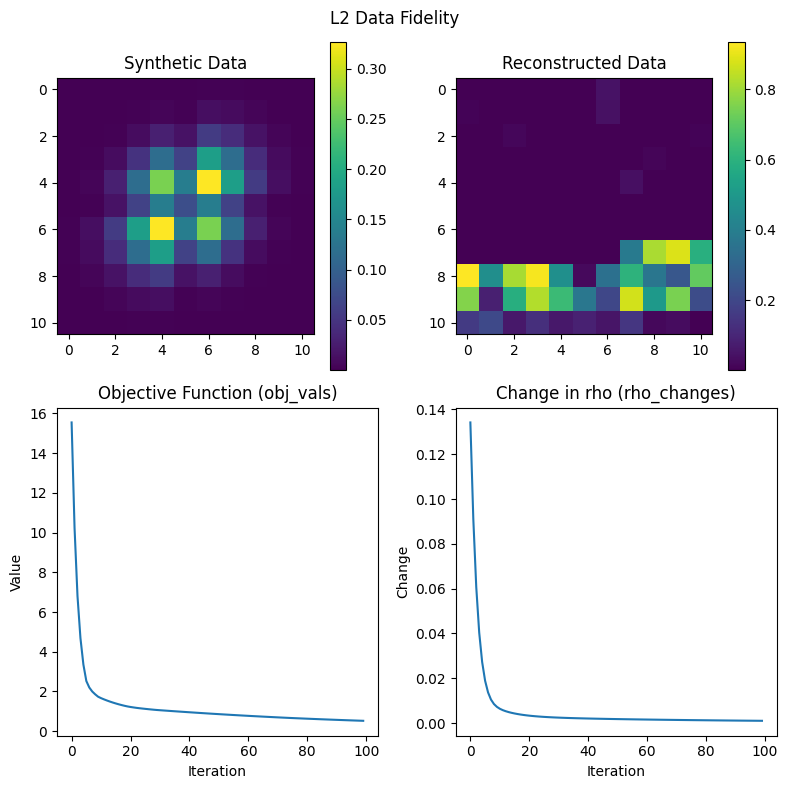

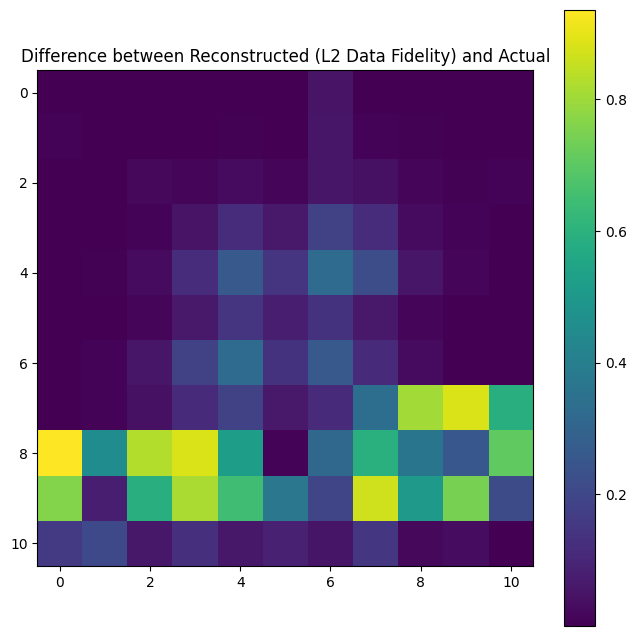

<ipython-input-12-ab5b88b6d137>:105: RuntimeWarning: invalid value encountered in double_scalars
  rho_change = np.linalg.norm(rho_new - rho) / np.linalg.norm(rho)


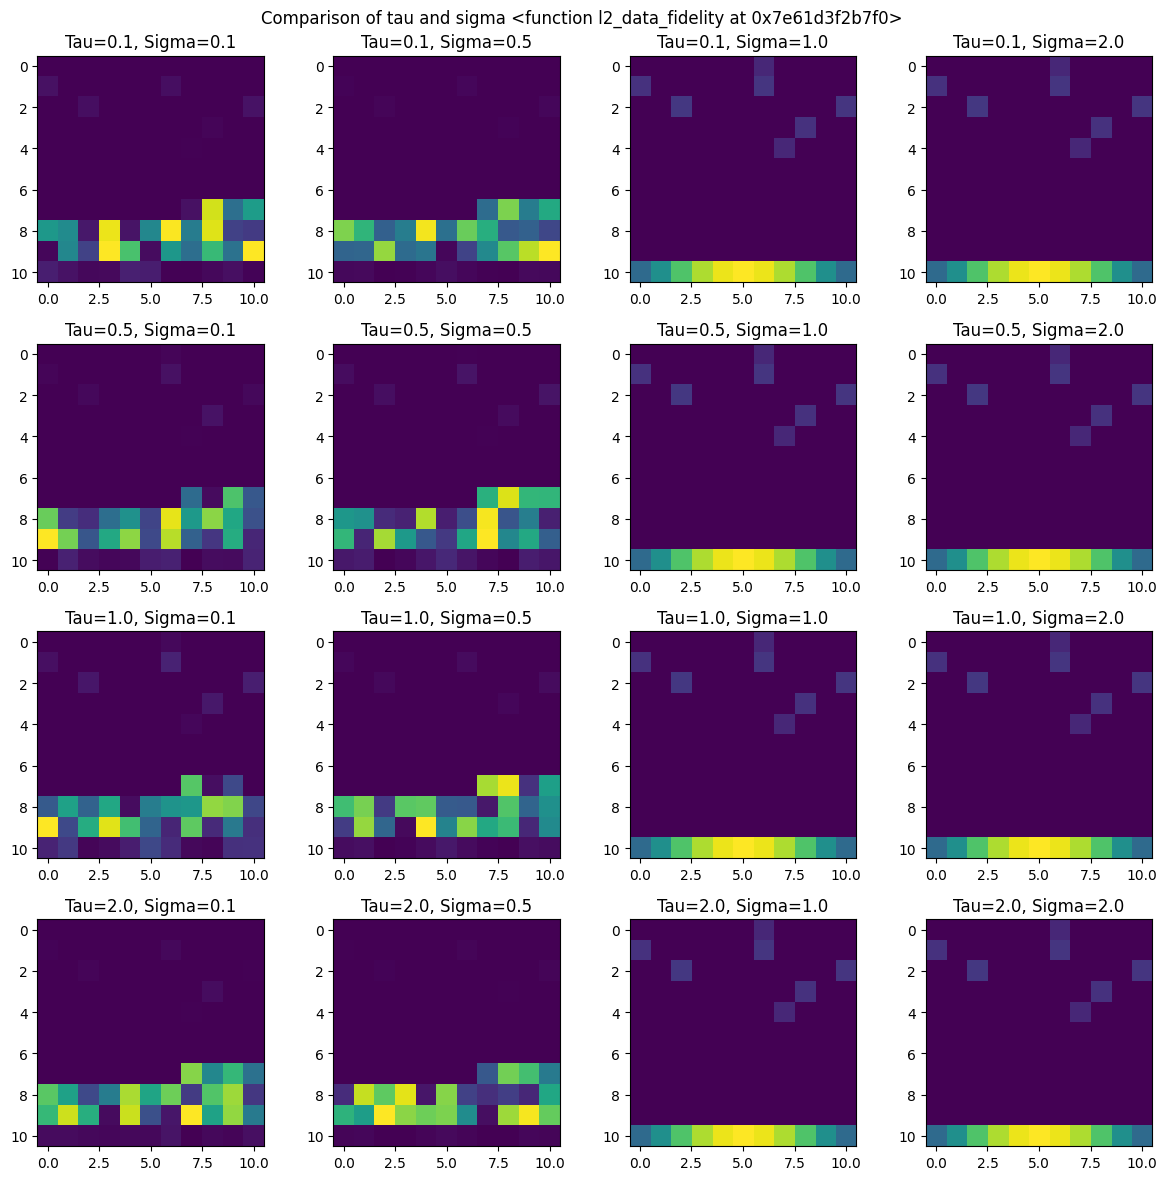

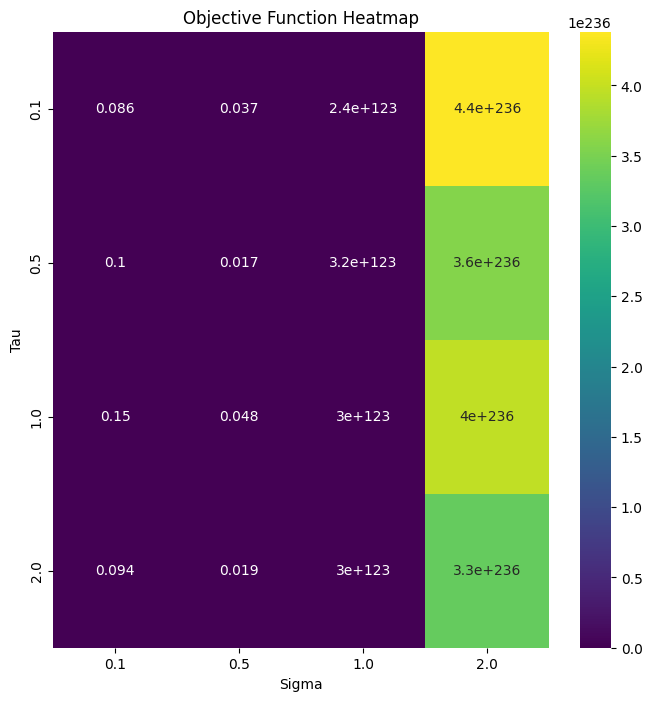

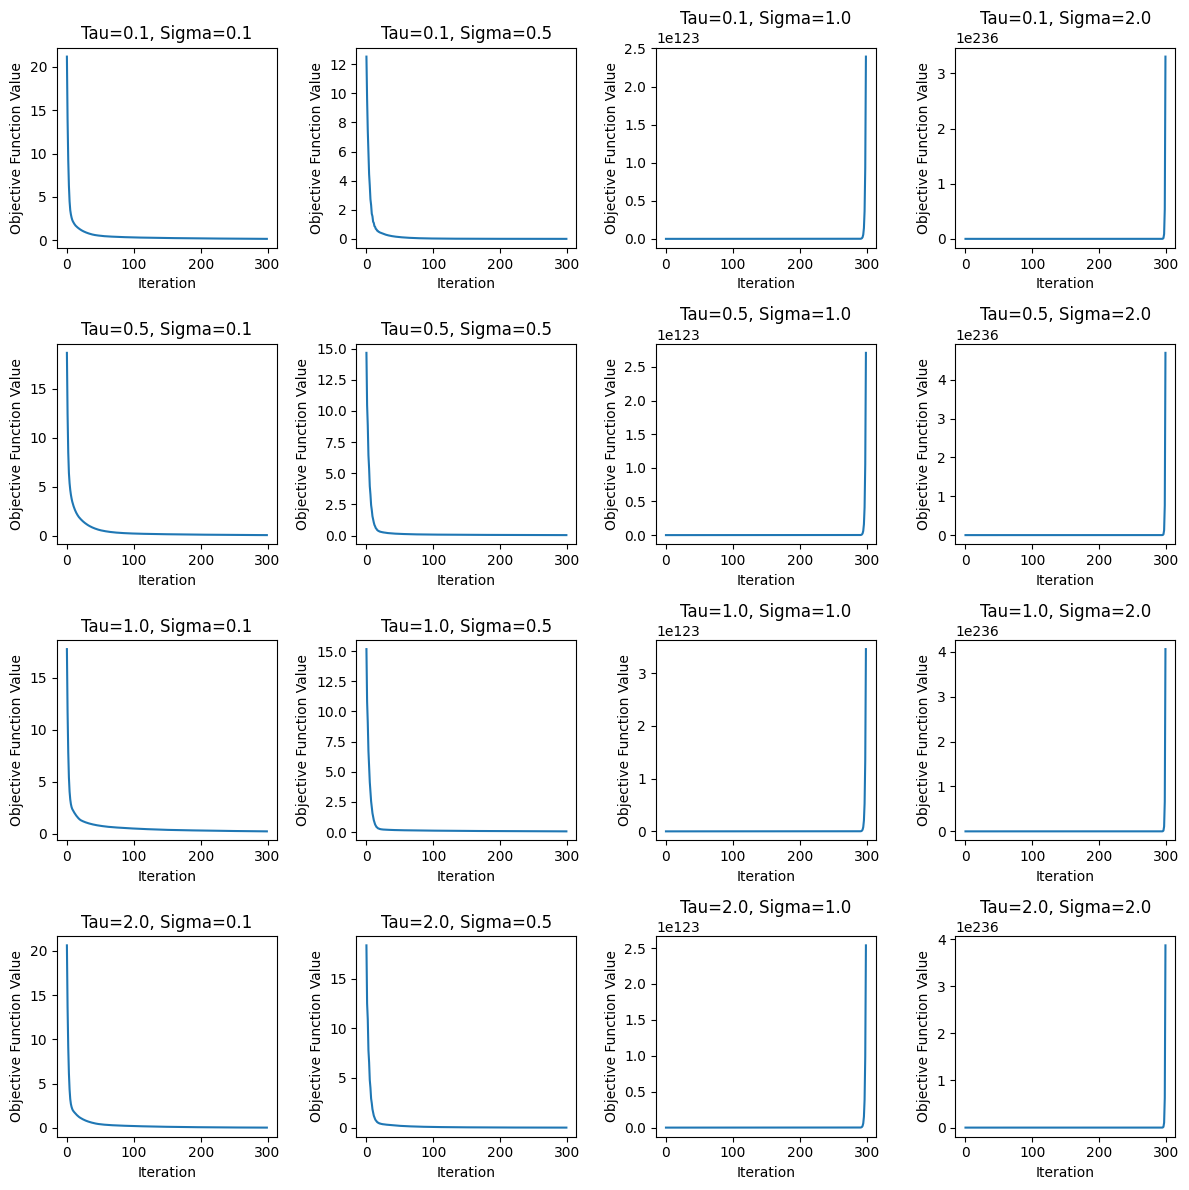

In [ ]:
# Step 1: Create synthetic data and parameters
p_synthetic = synthetic()
F_syn = ForwardProblem(p_synthetic)


# Step 2: Generate synthetic measurement data
synthetic_data = F_syn.create_synthetic_data()

# Step 3: Compute the forward operator matrix T
T_syn = F_syn.Tmat()
T_syn = pylops.MatrixMult(T_syn)

# Step 4: Use Chambolle-Pock algorithm for reconstruction
reconstructed_rho, obj_vals, rho_changes = chambolle_pock_convergence(
    synthetic_data, T_syn, l2_data_fidelity, niter=100, tau=1, sigma=0.1, theta=1)


difference = np.abs(reconstructed_rho.reshape(
    p_synthetic['Nrho'] + 1, -1) - p_synthetic['rho_ex'])

# Plot the results
plot_results(p_synthetic, reconstructed_rho, obj_vals,
             rho_changes, 'Synthetic Data', 'L2 Data Fidelity')

# Plot the difference
plt.figure(figsize=(8, 8))
plt.title('Difference between Reconstructed (L2 Data Fidelity) and Actual')
plt.imshow(difference, cmap='viridis')
plt.colorbar()
plt.show()

plot_variable_changes(p_synthetic, synthetic_data, T_syn, l2_data_fidelity)

objective_value_heatmap(synthetic_data, T_syn, l2_data_fidelity)

objective_value_plot(synthetic_data, T_syn, l2_data_fidelity)

# # calculate_mse(synthetic_data, T_syn, l2_data_fidelity, p_synthetic )

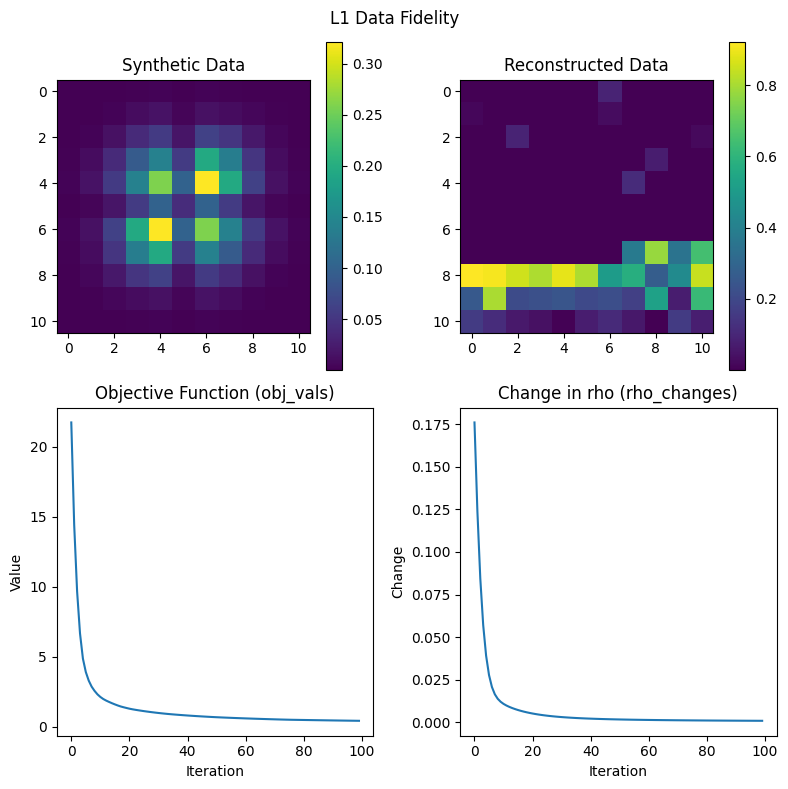

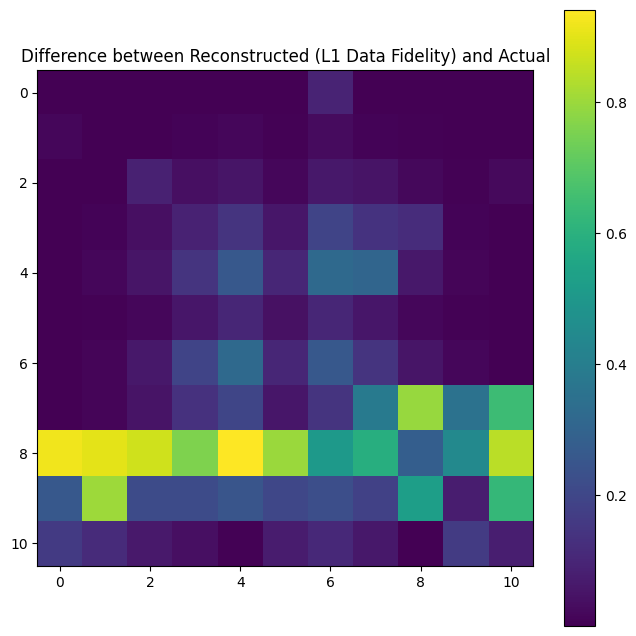

<ipython-input-12-ab5b88b6d137>:105: RuntimeWarning: invalid value encountered in double_scalars
  rho_change = np.linalg.norm(rho_new - rho) / np.linalg.norm(rho)


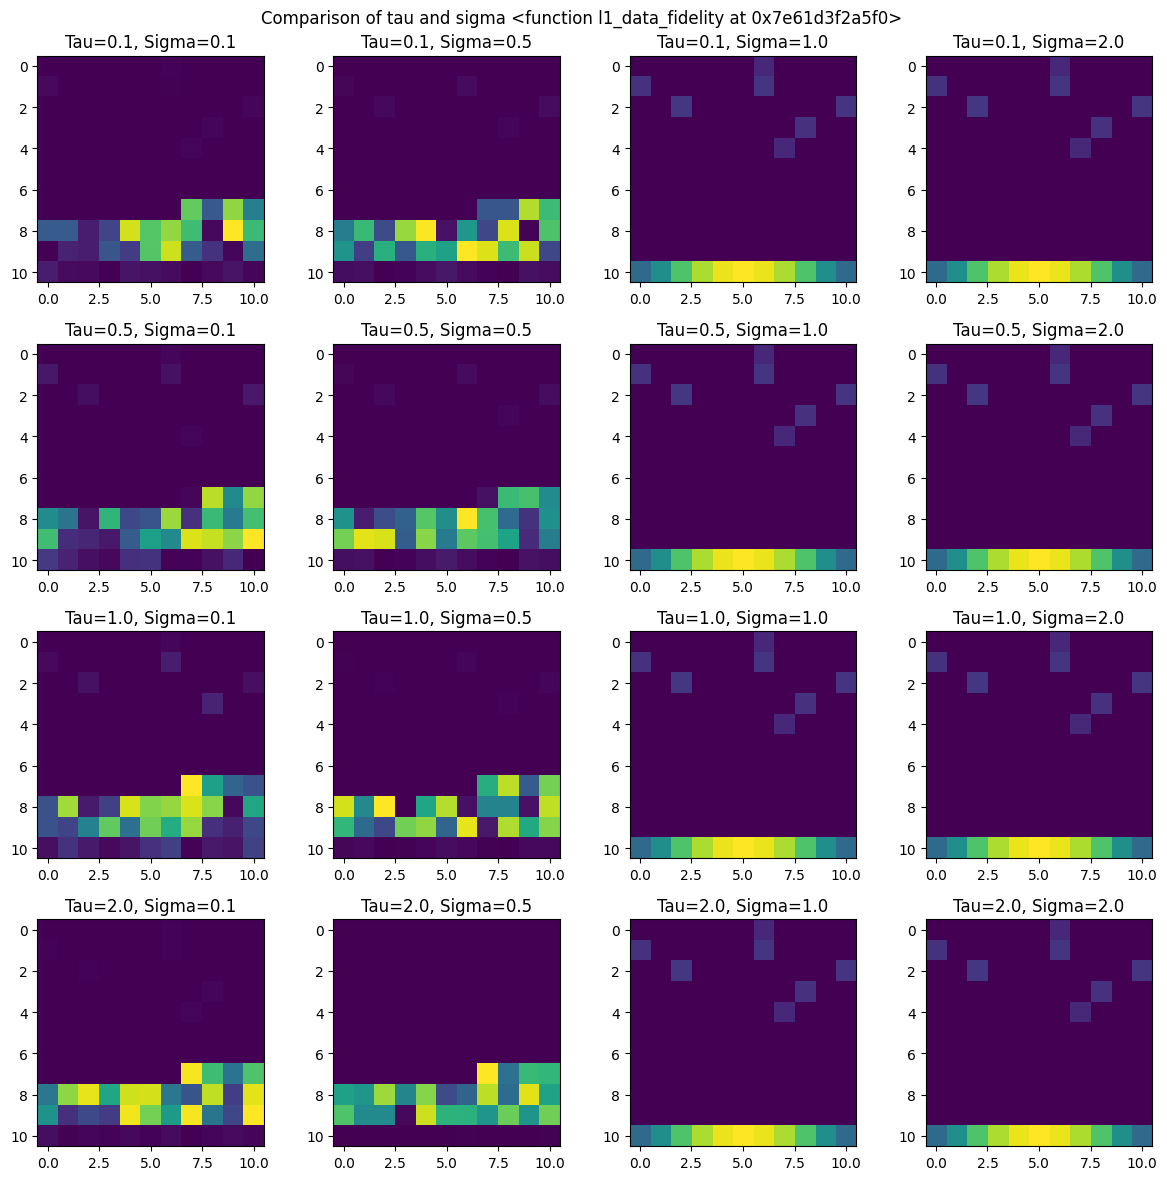

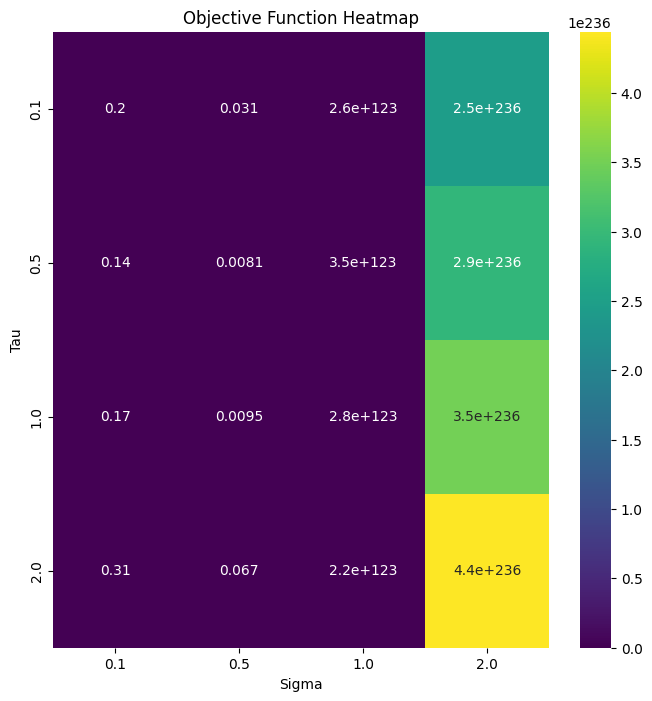

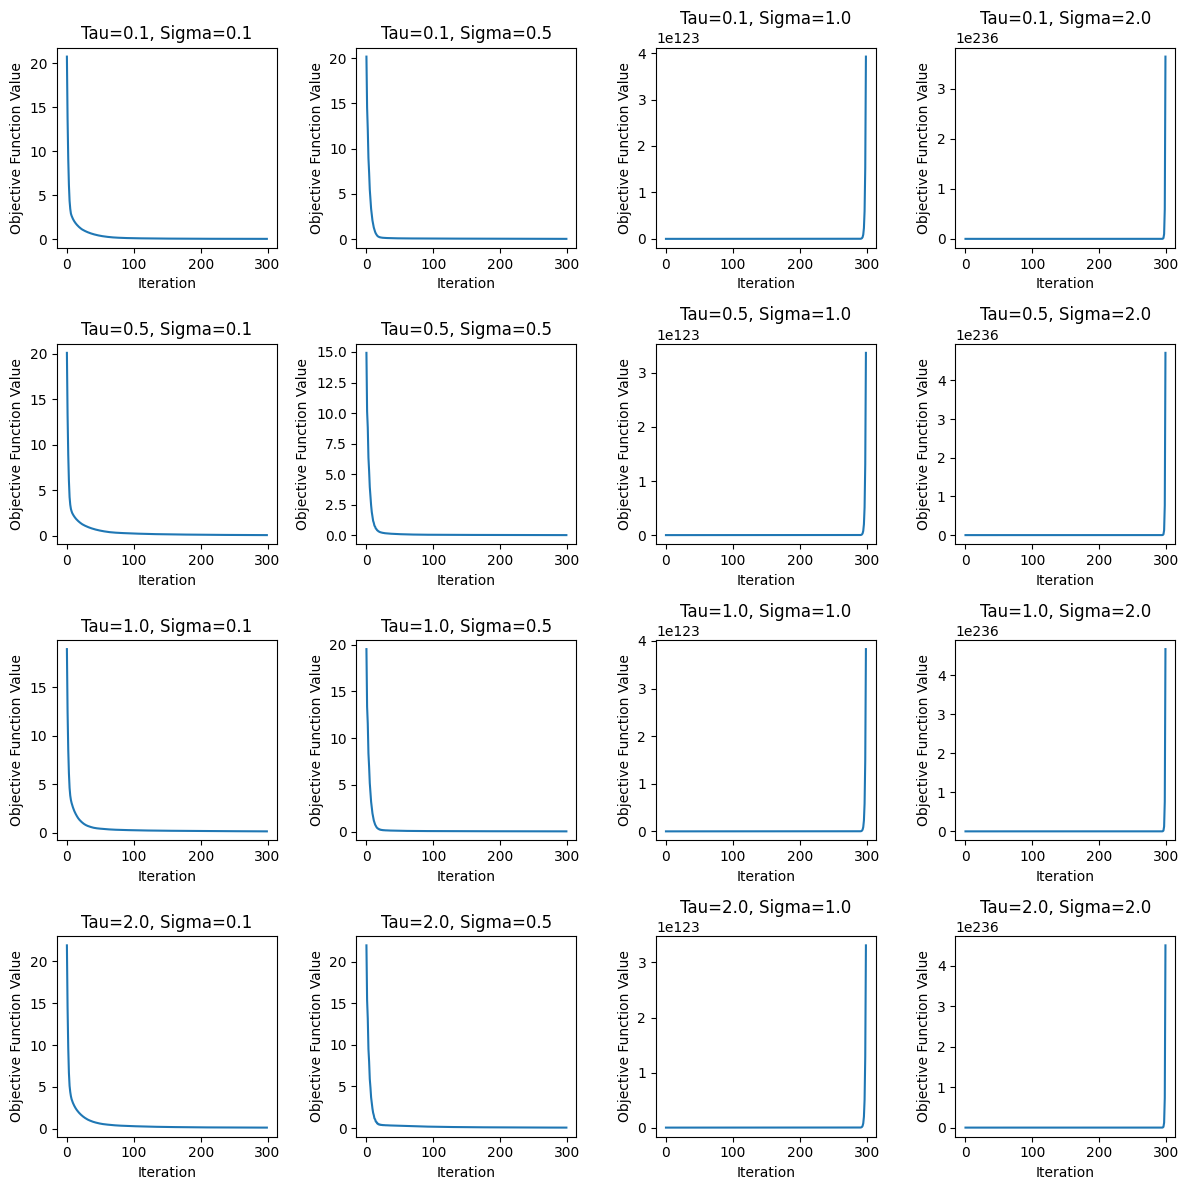

In [ ]:
# Step 1: Create synthetic data and parameters
p_synthetic = synthetic()
F_syn = ForwardProblem(p_synthetic)


# Step 2: Generate synthetic measurement data
synthetic_data = F_syn.create_synthetic_data()

# Step 3: Compute the forward operator matrix T
T_syn = F_syn.Tmat()
T_syn = pylops.MatrixMult(T_syn)

# Step 4: Use Chambolle-Pock algorithm for reconstruction
reconstructed_rho, obj_vals_, rho_changes_ = chambolle_pock_convergence(
    synthetic_data, T_syn, l1_data_fidelity, niter=100, tau=1, sigma=0.1, theta=1)

difference = np.abs(reconstructed_rho.reshape(
    p_synthetic['Nrho'] + 1, -1) - p_synthetic['rho_ex'])

# Plot the results
plot_results(p_synthetic, reconstructed_rho, obj_vals_,
             rho_changes_, 'Synthetic Data', 'L1 Data Fidelity')

# Plot the difference
plt.figure(figsize=(8, 8))
plt.title('Difference between Reconstructed (L1 Data Fidelity) and Actual')
plt.imshow(difference, cmap='viridis')
plt.colorbar()
plt.show()

plot_variable_changes(p_synthetic, synthetic_data, T_syn, l1_data_fidelity)

objective_value_heatmap(synthetic_data, T_syn, l1_data_fidelity)

objective_value_plot(synthetic_data, T_syn, l1_data_fidelity)

# calculate_mse(synthetic_data, T_syn, l2_data_fidelity)

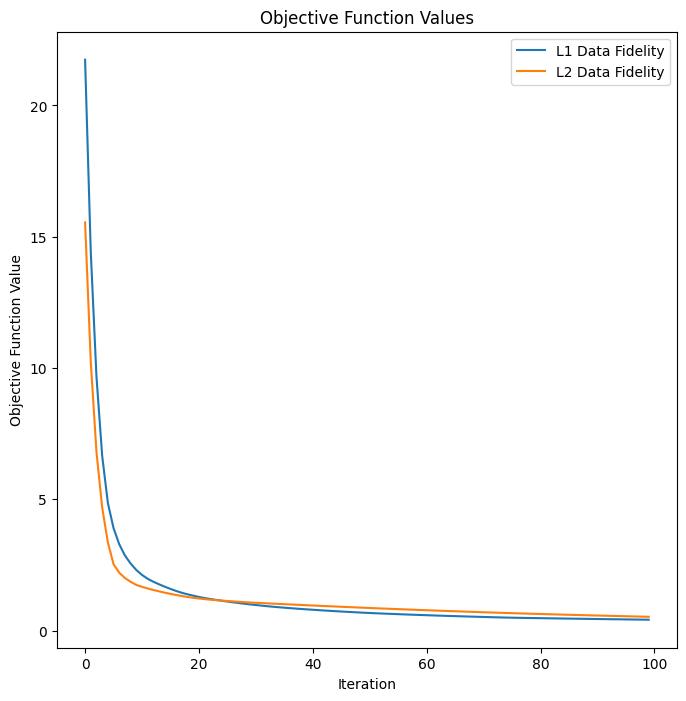

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Objective Function Values')
plt.plot(obj_vals_, label='L1 Data Fidelity')
plt.plot(obj_vals, label='L2 Data Fidelity')
# Add more lines for other data fidelity terms if applicable
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.show()

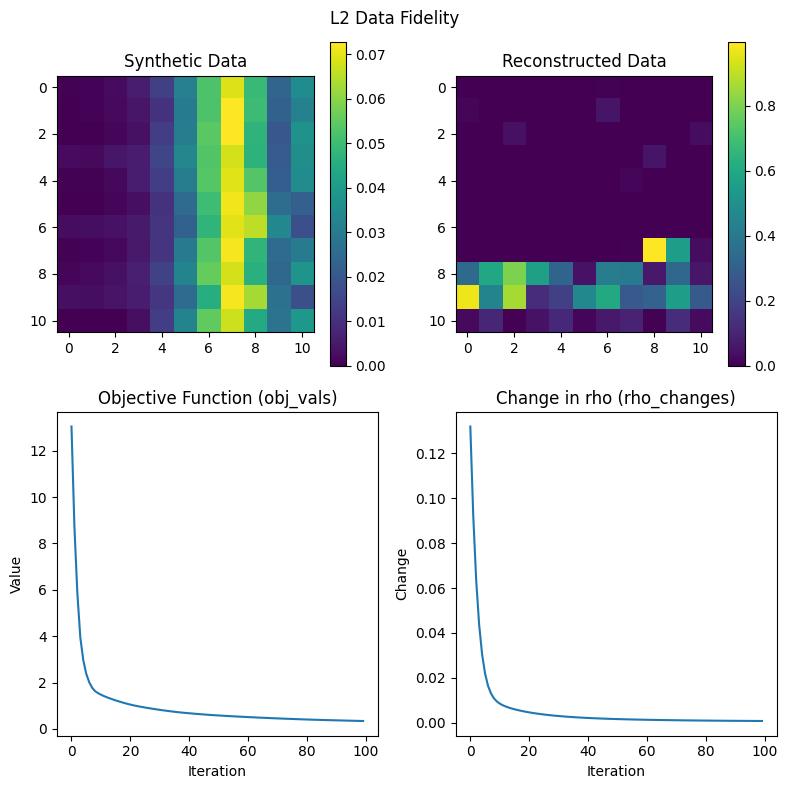

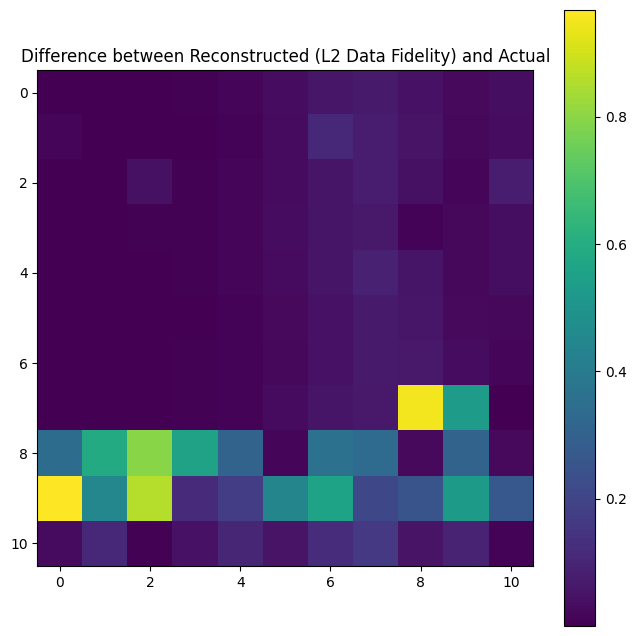

<ipython-input-12-ab5b88b6d137>:105: RuntimeWarning: invalid value encountered in double_scalars
  rho_change = np.linalg.norm(rho_new - rho) / np.linalg.norm(rho)


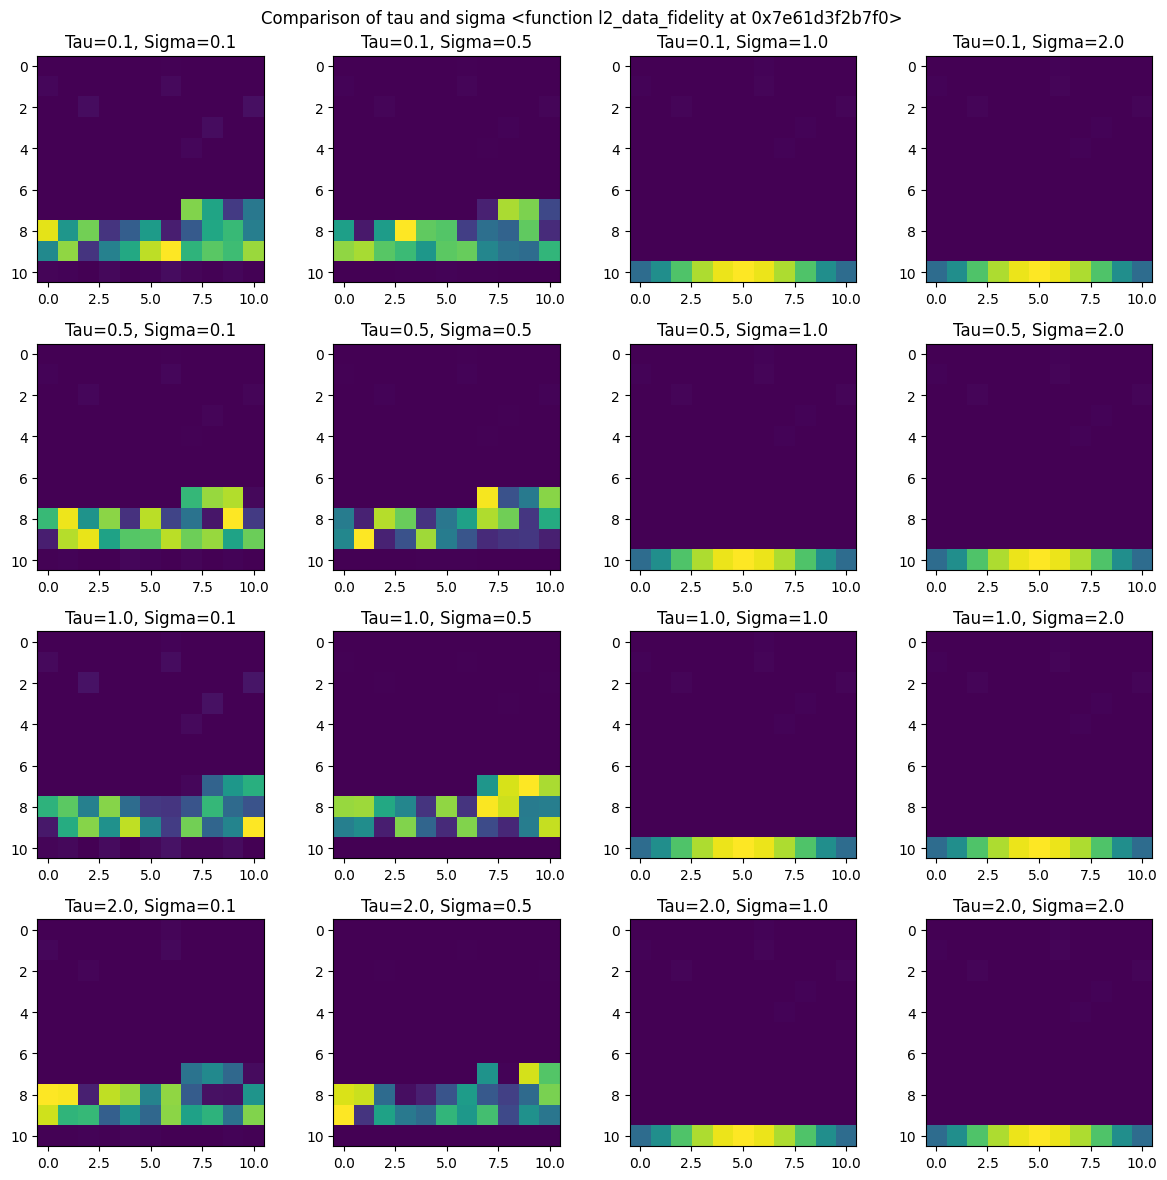

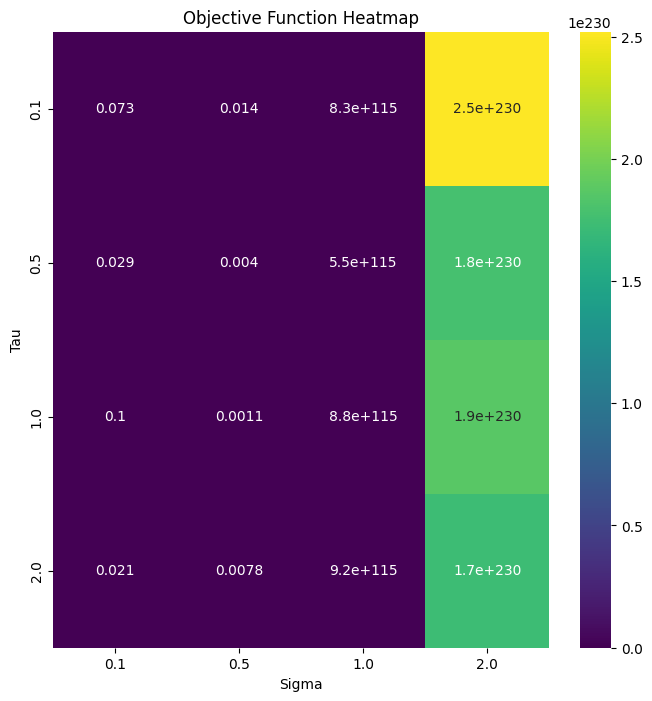

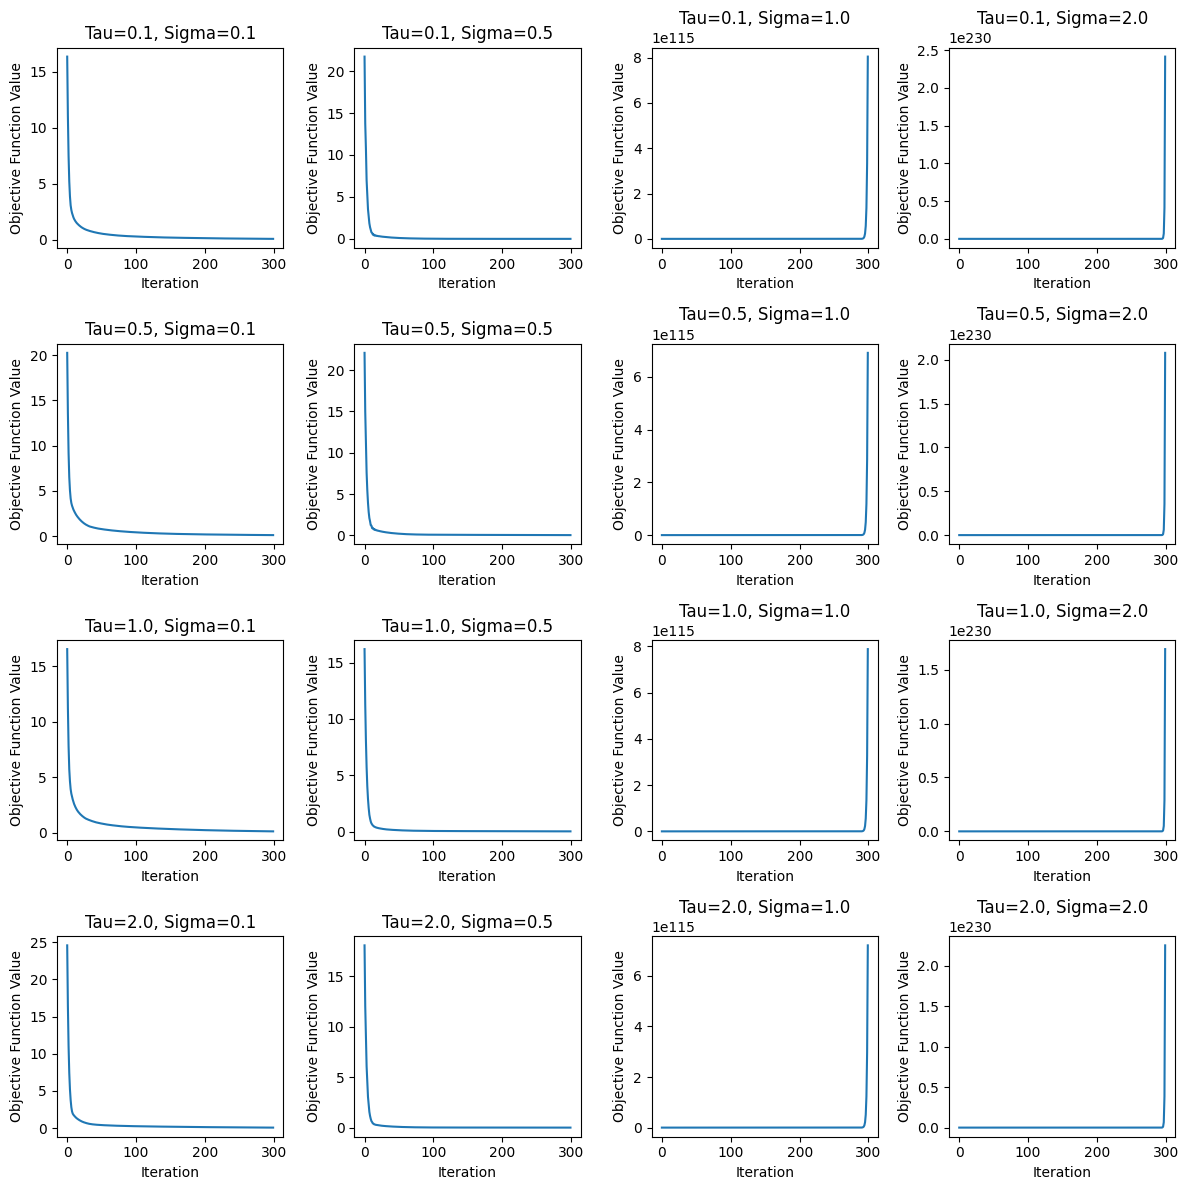

In [ ]:
# Step 1: Load experimental data and parameters
p_experimental = expdata()
F_exp = ForwardProblem(p_experimental)


# Step 2: Extract experimental data
T_exp = F_exp.Tmat()

data = sio.loadmat('data.mat')
experimental_data = data['data'][:T_exp.shape[0], 1]

# Step 3: Compute the forward operator matrix T
T_exp = pylops.MatrixMult(T_exp)

# Step 4: Use Chambolle-Pock algorithm for reconstruction
reconstructed_rho, obj_vals, rho_changes = chambolle_pock_convergence(
    experimental_data, T_exp, l2_data_fidelity, niter=100, tau=1, sigma=0.1, theta=1)

difference = np.abs(reconstructed_rho.reshape(
    p_experimental['Nrho'] + 1, -1) - p_experimental['rho_ex'])

# Plot the results
plot_results(p_experimental, reconstructed_rho, obj_vals,
             rho_changes, 'Synthetic Data', 'L2 Data Fidelity')

# Plot the difference
plt.figure(figsize=(8, 8))
plt.title('Difference between Reconstructed (L2 Data Fidelity) and Actual')
plt.imshow(difference, cmap='viridis')
plt.colorbar()
plt.show()

plot_variable_changes(p_experimental, experimental_data,
                      T_exp, l2_data_fidelity)

objective_value_heatmap(experimental_data, T_exp, l2_data_fidelity)

objective_value_plot(experimental_data, T_exp, l2_data_fidelity)

# calculate_mse(experimental_data, T_exp, l2_data_fidelity)

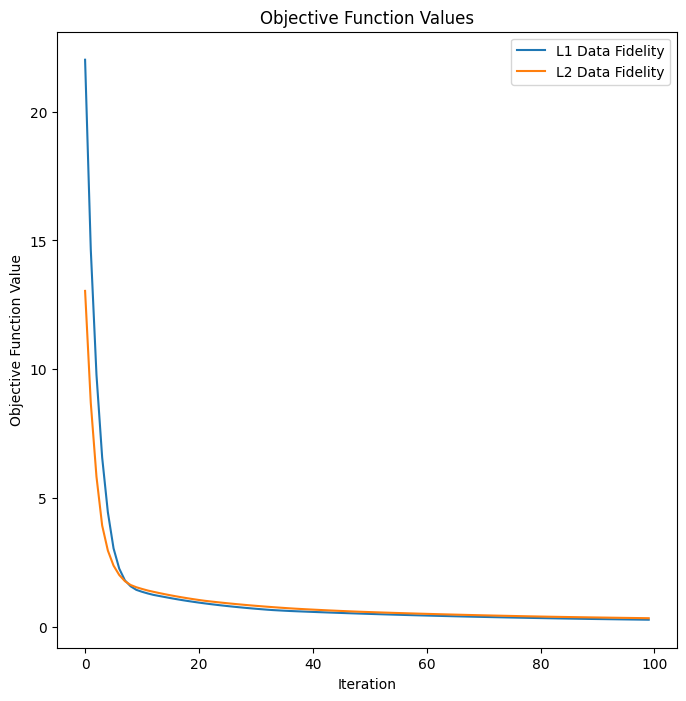

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Objective Function Values')
plt.plot(obj_vals_, label='L1 Data Fidelity')
plt.plot(obj_vals, label='L2 Data Fidelity')
# Add more lines for other data fidelity terms if applicable
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.show()